<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en) | <a href="https://github.com/erachelson/RLtuto">https://github.com/erachelson/RLtuto</a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">A walk in the garden of foundational ingredients, <br> theorems and algorithms in reinforcement learning</div>

Welcome to the RL restaurant! On the menu:
- Central intuitions for RL (section 1)
- Setting the stage (sections 2, 3, 4)
- Finally some learning (sections 5, 6)

My intention in this tutorial:
- a compendium of definitions, theorems and algorithms that you can re-use,
- minimal text, lots of room for discussion,
- rigorous mathematical understanding and algorithmic notions at the same time.

# Intuitions

## A medical prescription example

<center><img src="img/patient-doctor.png" style="height: 200px;"></center>

## Patient variables

<center>
<img src="img/patient_file.png" style="height: 100px;"> </img> <br>
Patient state now: $S_0$  <br>
Future states: $S_t$
</center>

$S_t$ random variable  
$\mathcal{S}$ patient description space, state space

## Prescription

<center>
<img src="img/prescription.png" style="height: 100px;"> </img> <br>
Prescription: $\left( A_t \right)_{t\in\mathbb{N}} = (A_0, A_1, A_2, ...)$
</center>

$A_t$ random variable  
$\mathcal{A}$ prescription space, action space

## Patient evolution


<center>
<img src="img/patient_evolution.png" style="height: 100px;"> </img> <br>
    $\mathbb{P}(S_t)$?
</center>

$\left( S_t \right)_{t\in\mathbb{N}}$ random process

## Physician's goal

<center><img src="img/patient_happy.png" style="height: 100px;"> </img> <br></center>

$$J \left( \left(S_t\right)_{t\in \mathbb{N}}, \left( A_t \right)_{t\in \mathbb{N}} \right)?$$

Make (keep) patient healthy, from $S_0$, until time horizon.  
$J \left( \left(S_t\right)_{t\in \mathbb{N}}, \left( A_t \right)_{t\in \mathbb{N}} \right)$: how good is a trajectory in the joint $S\times A$ space?

## Wrap-up

- Patient state $S_t$, random variable with values in $\mathcal{S}$,
- Physician instruction $A_t$, random variable with values in $\mathcal{A}$,
- Prescription $\left( A_t \right)_{t\in\mathbb{N}}$, sequence of random variables, random process  
- Patient's evolution $\mathbb{P}(S_t)$,  
- Patient's state trajectory $\left( S_t \right)_{t\in\mathbb{N}}$, random process, 
- Patient's full trajectory $\left( S_t, A_t \right)_{t\in\mathbb{N}}$, random process, 
- Value of a trajectory $J \left( \left(S_t, A_t \right)_{t\in \mathbb{N}} \right)$.  

It seems reasonable that the physician's recommendation $\mathbb{P}(A_t)$ at step $t$ be dependent on previously observed states $\left(S_0, \ldots, S_t\right)$ and recommended treatments $\left(A_0, \ldots, A_{t-1}\right)$.

## Common misconception

You will often see the following type of drawing, along with a sentence like "RL is concerned with the problem on an agent performing actions to control an environment". 

<center><img src="img/misconception.png" style="height: 300px;"></img></center>

Not false, but prone to (anthropomorphic) misconceptions:  
No separation between a *state of the agent* and a *state of the environment*.

Less shiny but more accurate drawing:  

<center><img src="img/dynamic.png" style="height: 300px;"></img></center>

A *System to control*, described through its observed *state*, controlled by the application of actions issued from a *policy* or *control law*. The process of *learning* this policy is what RL is concerned with.

# Ingredients (definitions)

## Markov decision processes

<div class="alert alert-info"><b>Definition: Markov Decision Process (MDP)</b><br>
A Markov Decision Process is given by:
<ul>
<li> A set of states $\mathcal{S}$
<li> A set of actions $\mathcal{A}$
<li> A (Markovian) transition model $\mathbb{P}\left(S_{t+1} | S_t, A_t \right)$, noted $p(s'|s,a)$
<li> A reward model $\mathbb{P}\left( R_t | S_t, A_t, S_{t+1} \right)$, noted $r(s,a)$ or $r(s,a,s')$
<li> A set of discrete decision epochs $\mathcal{T}=\{0,1,\ldots,h\}$
</ul>
</div>

**Examples**  
- video games,
- robots,
- agro-ecosystems,
- biological systems,
- financial marketplaces,
- communication networks,
- supply-chain systems, etc.

In short: any fully-observable "$s_{t+1} = f(s_t,a_t) + noise$" dynamical system.

Today's tutorial: $h=+\infty$.

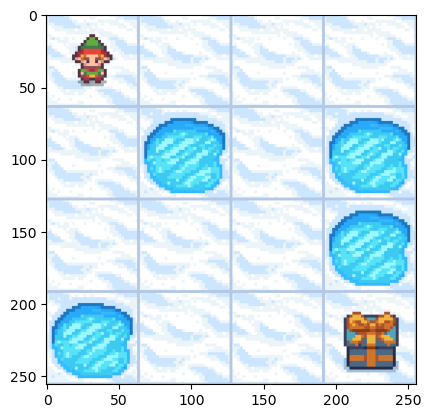

In [1]:
# The "frozen lake" toy MDP
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1', render_mode="rgb_array")
env.reset()
plt.imshow(env.render());

[Link to the Gymnasium website](https://gymnasium.farama.org/)

In [2]:
# State and action space
print("State space: ", env.observation_space)
print("Action space:", env.action_space)

State space:  Discrete(16)
Action space: Discrete(4)


In [3]:
import gymnasium.envs.toy_text.frozen_lake as fl
actions = {fl.LEFT: '\u2190', fl.DOWN: '\u2193', fl.RIGHT: '\u2192', fl.UP: '\u2191'}
print(actions)

{0: '←', 1: '↓', 2: '→', 3: '↑'}


In [4]:
# Transition model
s=2
a=1
print("Example of transition: (s=", s, 
      ",a=", actions[a], 
      ") \u27FF s=", env.unwrapped.P[s][a][0][1], 
      " with proba ", env.unwrapped.P[s][a][0][0], 
      ".", sep='')
print("All transitions from (s=", s, 
      ",a=", actions[a], 
      "):", sep='')
print(env.unwrapped.P[s][a])

Example of transition: (s=2,a=↓) ⟿ s=1 with proba 0.3333333333333333.
All transitions from (s=2,a=↓):
[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 3, 0.0, False)]


In [5]:
# Reset the environment
s, prob = env.reset()
print("Initial state:", s)

Initial state: 0


Old state: 0
Action:   2 (→)
New state: 0
Reward:    0.0
Game over: False
Truncated: False


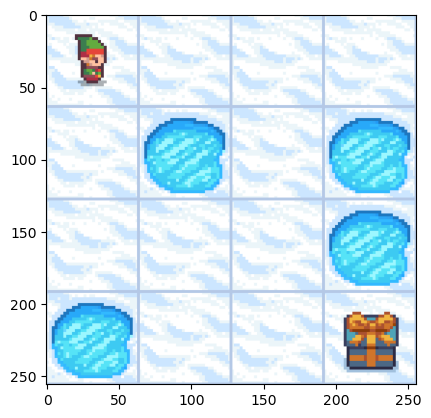

In [6]:
# Take an action in the MDP
a=2
print("Old state:", s)
s, r, done, truncated, info = env.step(a)
print("Action:   ", a, " (", actions[a], ")", sep="")
print("New state:", s)
print("Reward:   ", r)
print("Game over:", done)
print("Truncated:", truncated)
plt.imshow(env.render());

## Policies

Formally, how does one write the behavior of an agent?
This behavior specifies how to choose actions at each time step:
$$A_t \sim \pi_t.$$

Let $\Delta_\mathcal{A}$ be the set of probability measures on the action space $\mathcal{A}$. Then the law $\pi_t$ of $A_t$ belongs to $\Delta_\mathcal{A}$.  
$\pi_t$ is called the **decision rule** at step $t$, it is a distribution over the action space $\mathcal{A}$.  
The collection $\pi = \left(\pi_t \right)_{t\in \mathcal{T}}$ is called a **policy**.

<div class="alert alert-info"><b>Definition: policy $\pi$</b><br>
A policy $\pi$ is a sequence of decision rules $\pi_t$: $\pi = \{\pi_t\}_{t\in \mathcal{T}}$, with $\pi_t \in \Delta_\mathcal{A}$.
</div>

In [7]:
# A deterministic policy which always moves right
import numpy as np
pi = np.ones(env.observation_space.n)
print("A deterministc policy:", pi)

A deterministc policy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
# A randomly-drawn deterministic policy
max_action = env.action_space.n - 1
pi = np.round(max_action * np.random.random((env.observation_space.n)))
print("A randomly-drawn deterministic policy:", pi)

A randomly-drawn deterministic policy: [3. 3. 3. 1. 1. 1. 2. 2. 1. 1. 0. 0. 3. 2. 2. 1.]


In [9]:
def print_policy(pi):
    for row in range(env.unwrapped.nrow):
        for col in range(env.unwrapped.ncol):
            s = row*env.unwrapped.ncol+col
            print(actions[pi[s]], end='')
        print()
    return

In [10]:
print_policy(pi)

↑↑↑↓
↓↓→→
↓↓←←
↑→→↓


## Values 

The **return** random variable:
$$G^\pi(s) = \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s,\\ A_t \sim \pi_t,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$

<div class="alert alert-info"><b>Definition: value function $v^\pi$ of a policy $\pi$ under a $\gamma$-discounted criterion</b><br>
$$v^\pi : \left\{\begin{array}{ccl}
\mathcal{S} & \rightarrow & \mathbb{R}\\
s & \mapsto & v^\pi(s)=\mathbb{E}\left( \sum\limits_{t = 0}^\infty \gamma^t R_t \bigg| S_0 = s, \pi \right)\end{array}\right. $$
</div>


<div class="alert alert-info"><b>Definition: state-action value function $q^\pi$</b><br>
$$q^\pi(s,a) = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t r\left(S_t, A_t, S_{t+1}\right) \bigg| S_0 = s, A_0=a, \pi \right)$$
</div>

In [11]:
# Monte Carlo evaluations
import numpy as np
pi0 = 0*np.ones(env.observation_space.n)
pi1 = 1*np.ones(env.observation_space.n)
pi2 = 2*np.ones(env.observation_space.n)
pi3 = 3*np.ones(env.observation_space.n)
pi4 = np.round(3*np.random.random((env.observation_space.n)))
pi5 = np.array([2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2])
policies = [pi0, pi1, pi2, pi3, pi4, pi5]
rollouts = 100
horizon = 200
gamma = .99
v0 = 0

for pi in policies:
    for ep in range(rollouts):
        s, _ = env.reset()
        G = 0
        for t in range(horizon):
            a = pi[s]
            s, r, done, _, _ = env.step(a)
            G += gamma**t * r
            if done:
                break
        v0 += G
    v0 = v0/rollouts
    print_policy(pi)
    print("    v^pi(s_0) =", v0)

←←←←
←←←←
←←←←
←←←←
    v^pi(s_0) = 0.0
↓↓↓↓
↓↓↓↓
↓↓↓↓
↓↓↓↓
    v^pi(s_0) = 0.02697753235718837
→→→→
→→→→
→→→→
→→→→
    v^pi(s_0) = 0.0649681600422333
↑↑↑↑
↑↑↑↑
↑↑↑↑
↑↑↑↑
    v^pi(s_0) = 0.000649681600422333
↑↓↓↓
←↓←↓
↓←→↓
→↓↑→
    v^pi(s_0) = 6.49681600422333e-06
→→↓←
→→↓←
→→↓←
→→→→
    v^pi(s_0) = 0.009043885718248086


## Optimality

<div class="alert alert-info"><b>Definition: optimal policy $\pi^*$</b><br>
$\pi^*$ is said to be optimal iff $\pi^* \in \arg\max\limits_{\pi} v^\pi$.<br>
<br>
    
A policy is optimal if it **dominates** over any other policy in every state:
$$\pi^* \textrm{ is optimal}\Leftrightarrow \forall s\in \mathcal{S}, \ \forall \pi, \ v^{\pi^*}(s) \geq v^\pi(s)$$
</div>

$v^*$ is the unique value function of any optimal policy.  
$q^*$ is the unique state-action value function of any optimal policy.

# Optimal policies

<div class="alert alert-success"><b>Theorem: family of optimal policies</b><br>
There always exists at least one optimal stationary, deterministic, memoryless policy.</div>

Consequence: much easier to search for than non-stationary, stochastic, history-dependent policies.

<div class="alert alert-success">

**Theorem: the policy optimization problem:**  
Provided $\rho_0$ has non-zero probability mass on all states, an optimal policy is a solution to $\max_\pi J(\pi) = \mathbb{E}_{s_0\sim \rho_0}[v^\pi(s_0)]$.
</div>

Consequence: single scalar optimization problem, rather than $|\mathcal{S}|$ coupled optimization problems.

<div class="alert alert-success">
    
**Theorem: Optimal greedy policy**  
$\pi(s) \in \arg\max\limits_{a\in \mathcal{A}} q^*(s,a), \forall s$ is an optimal deterministic policy.  
$\pi(s) \in \arg\max\limits_{\delta \in \Delta_\mathcal{A}} \mathbb{E}_{a\sim \delta} [q^*(s,a)], \forall s$ is an optimal stochastic policy.
</div>

Consequence: finding $q^*$ provides $\pi^*$ if one can solve this $\max_a$ easily.

In [12]:
# Greedy policy from a random q-function
import numpy as np
q = np.random.random((env.observation_space.n, env.action_space.n))

def greedyQpolicy(Q):
    pi = np.zeros((env.observation_space.n),dtype=int)
    for s in range(env.observation_space.n):
        pi[s] = np.argmax(Q[s,:])
    return pi

print("q-function:\n", q)
print("greedy deterministic policy:\n",greedyQpolicy(q))

q-function:
 [[0.63453004 0.18315663 0.65244752 0.48536988]
 [0.56401436 0.12889757 0.72270076 0.0746476 ]
 [0.31751459 0.11896834 0.95250213 0.1112757 ]
 [0.73875349 0.69877233 0.65464306 0.14933733]
 [0.10374846 0.31666329 0.95292837 0.5165765 ]
 [0.08618047 0.19162998 0.28047674 0.91883791]
 [0.43117534 0.76853588 0.66880609 0.92393782]
 [0.90571158 0.24304025 0.34263631 0.84442046]
 [0.06328461 0.48602461 0.06009513 0.39898727]
 [0.96578133 0.82403825 0.23143745 0.54215459]
 [0.97904681 0.41809606 0.74105168 0.34825602]
 [0.68134127 0.68747679 0.1609644  0.60268466]
 [0.16916351 0.16081765 0.92015172 0.10814257]
 [0.8486662  0.95805044 0.50472698 0.21050379]
 [0.81121214 0.82850022 0.78387937 0.78113136]
 [0.75913262 0.45850878 0.8113045  0.29613018]]
greedy deterministic policy:
 [2 2 2 0 2 3 3 0 1 0 0 1 2 1 1 2]


# Characterizing value functions: the Bellman equations

<div class="alert alert-success">
    
**Theorem: the evaluation equation**  
$v^\pi$ obeys the linear system of equations:
$$v^\pi\left(s\right) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ v^\pi(s') \right]$$

$q^\pi$ obeys the linear system of equations:
$$q^\pi\left(s,a\right) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ q^\pi(s',\pi(s')) \right]$$
</div>

Comment: this is a dynamic programming equation. The value $v^\pi(s)$ of the trajectory starting in $s$ is the sum of the first step's reward $r(s,\pi(s))$ and the discounted value from the outcome state $v^\pi(s')$.

<div class="alert alert-info">
    
**Definition: Bellman evaluation operator $T^\pi$**
$$(T^\pi v)\left(s\right) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ v(s') \right]$$
$$(T^\pi q)\left(s,a\right) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ q(s',\pi(s')) \right]$$
</div>

The evaluation equation:  
$v^\pi$ is the unique solution to $v=T^\pi v$,  
$q^\pi$ is the unique solution to $q = T^\pi q$.

<div class="alert alert-success">
    
**Theorem: the optimality equation**  
$$v^*(s) = \max\limits_{a\in \mathcal{A}} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} v^*(s') \right]$$
$$q^*(s,a) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in \mathcal{A}} q^*(s',a') \right]$$
</div>

Comment: this is a dynamic programming equation again. The largest expected return $v^*(s)$ is the largest possible sum of the one-step reward $r(s,a)$ and the optimal value from to outcome state $v^*(s')$.

<div class="alert alert-info">
    
**Definition: Bellman optimality operator**  
$$(T^*v)(s) = \max\limits_{a\in \mathcal{A}} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} v(s') \right]$$
$$(T^*q)(s,a) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in \mathcal{A}} q(s',a') \right]$$
</div>

The optimality equation:  
$v^*$ is the unique solution to $v=T^*v$,  
$q^*$ is the unique solution to $q=T^*q$.

<div class="alert alert-success">
    
**Theorem: $T^*$ and $T^\pi$ are $L_\infty$-contraction mappings**  

</div>

Consequence:  
$v^\pi$ is the limit of the sequence $v_{n+1} = T^\pi v_n$, $q^\pi$ is the limit of the sequence $q_{n+1} = T^\pi q_n$,  
$v^*$ is the limit of the sequence $v_{n+1} = T^* v_n$, $q^*$ is the limit of the sequence $q_{n+1} = T^* q_n$.

<div class="alert alert-warning">

**Algorithm: value iteration**  
The algorithm that computes the sequence $Q_{n+1} = T^* Q_n$ for a finite number of iterations is called **value iteration**.
</div>

In [13]:
# Value iteration
# Input: nb iterations, q0
# Output: q*

import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
# use render_mode="human" to open the game window
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

nb_iter = 20
gamma = 0.9
q = np.zeros((env.observation_space.n, env.action_space.n))
qopt_sequence = [q]
for i in range(nb_iter):
    qnew = np.zeros((env.observation_space.n, env.action_space.n))
    for x in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[x][a]
            for o in outcomes:
                p = o[0]
                y = o[1]
                r = o[2]
                qnew[x,a] += p * (r + gamma*np.max(q[y,:]) )
    q = qnew
    qopt_sequence.append(q)

In [16]:
print_policy(greedyQpolicy(q))

←↑←↑
←←←←
↑↓←←
←→↓←


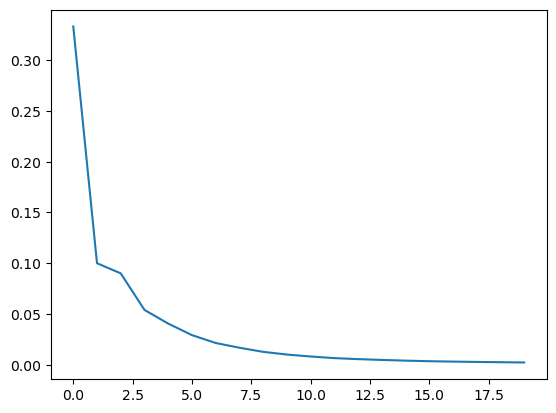

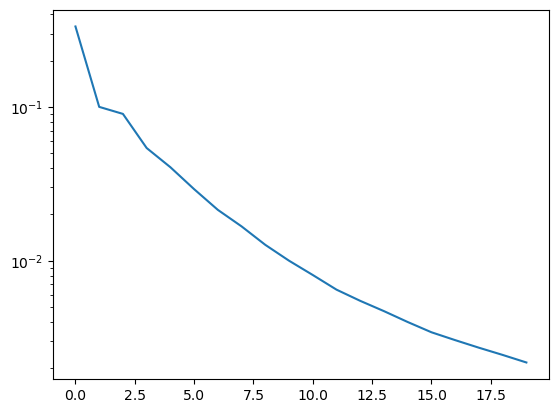

In [17]:
# Plotting the convergence of the sequence
import matplotlib.pyplot as plt
%matplotlib inline

residuals = []
for i in range(1, len(qopt_sequence)):
    residuals.append(np.max(np.abs(qopt_sequence[i]-qopt_sequence[i-1])))

plt.plot(residuals)
plt.figure()
plt.semilogy(residuals);

<div class="alert alert-warning">
    
**Approximate Value Iteration** is the algorithm that computes the sequence $Q_{n+1} = \mathcal{A} T^* Q_n$, where $\mathcal{A}$ is an approximation procedure.
</div>

<div class="alert alert-success">
    
**Theorem: asymptotical behavior of AVI.**  

If $\| f-\mathcal{A}f \|_\infty \leq \epsilon, \forall f \in \mathbb{R}^{SA}$,

$$\exists N\in \mathbb{N}, \textrm{such that }\| Q^* - Q_n \|_\infty \leq \frac{\epsilon}{1-\gamma}, \forall n\leq N.$$

Let $\pi_n$ be the greedy policy with respect to $Q_n$,
$$\|Q^*-Q^{\pi_n}\|_\infty \leq \frac{2\gamma\epsilon}{(1-\gamma)^2}, \forall n \leq N.$$

</div>
Warning: AVI does not (necessarily) converge!  
But it reaches policies whose values are close to optimal.

Info: similar bounds in weighted L2 norm (more suited to learning).